#SPRINT 8

- Realizarás una visualización para cada ejercicio. 
- Comenta lo que llama la atención de graficar esta variable 
- justifica la elección del gráfico 
- interpreta los resultados en función de tus datos.


In [1]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks", palette="pastel")

connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Geo",         
    database="sprint4"      
    )

# 🔍 Obtener nombres de todas las tablas
cursor = connection.cursor()
cursor.execute("SHOW TABLES")
lista_tablas = [tabla[0] for tabla in cursor.fetchall()]  #lista - tabla[0]= primer elem de la tupla

cant_tablas = 0

for tabla in lista_tablas:  
    #print(tabla)
    cant_tablas += 1
print ("***** Cantidad de Tablas en la BBDD: " , cant_tablas, '*****\n')    


# Cargar cada tabla como DataFrame

for tabla in lista_tablas:
    #print(f"OK: {tabla}")
    df = pd.read_sql(f"SELECT * FROM `{tabla}`", connection)
    globals()[tabla] = df  # Crea una variable global con el nombre de la tabla   #dataframes[tabla] = df #sustituye globals
    print(tabla, '||', df.shape)

***** Cantidad de Tablas en la BBDD:  7 *****

companies || (100, 6)
credit_card_status || (275, 2)
credit_cards || (275, 9)
products || (100, 6)
transaction_products || (1457, 2)
transactions || (587, 10)
users || (275, 10)


C:\Users\Georgina\AppData\Local\Temp\ipykernel_28128\1673300495.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM `{tabla}`", connection)


In [2]:
#tablas merge

#transactions-users
merge_tx_user = transactions.merge(users, left_on='user_id', right_on='id')
merge_cards_users = credit_cards.merge(users, left_on = 'user_id', right_on= 'id')

#transactions + products
products['id'] = products['id'].astype(str)
transactions['id'] = transactions['id'].astype(str)

transaction_products['product_id'] = transaction_products['product_id'].astype(str)
transaction_products['transaction_id'] = transaction_products['transaction_id'].astype(str)

# Unir la tabla intermedia con transactions
merge_tp = transaction_products.merge(transactions, left_on='transaction_id', right_on='id')
# Unir el resultado con df_products
merge_tp_final = merge_tp.merge(products, left_on='product_id', right_on='id')

In [13]:
#Transformaciones

transactions.rename(columns={'amount': 'transaction_US$'}, inplace=True)  #rename cols
products.rename(columns={'price': 'price_US$'}, inplace=True)

#Reemplazar los nombres de categorias de 'declined'
transactions['declined'] = transactions['declined'].astype('str').replace({'0': 'Aprobada', '1': 'Rechazada'})


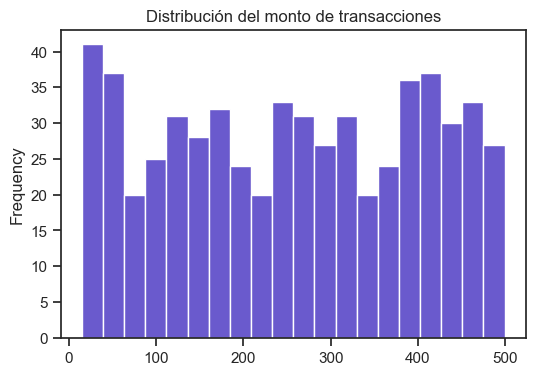

In [4]:
# Ejercicio 1
# Una variable numérica

hist_amount = transactions['transaction_US$'].plot.hist(bins = 20, title= 'Distribución del monto de transacciones', 
                color = 'slateblue', figsize= (6, 4))  
hist_amount;

Justificacion del gráfico:

El gráfico 'Histograma' ofrece una forma sencilla de visualizar la distribución de una variable numérica 
mostrando en el eje X sus diferentes rangos o particiones y, en el eje y la frecuencia o recuento de los datos de cada segmento.

Interpretación de los resultados:

El monto de las transacciones muestra un mayor número de operaciones en los rangos más bajos, especialmente en montos de hasta 50 euros, 
aunque sin un pico muy pronunciado. Por otro lado, entre los 50 y 500 euros, los datos exhiben un patrón tipo 'serrucho', 
con oscilaciones en la cantidad de transacciones, que fluctuan entre 20 y 35 operaciones por intervalo (20 intervalos)

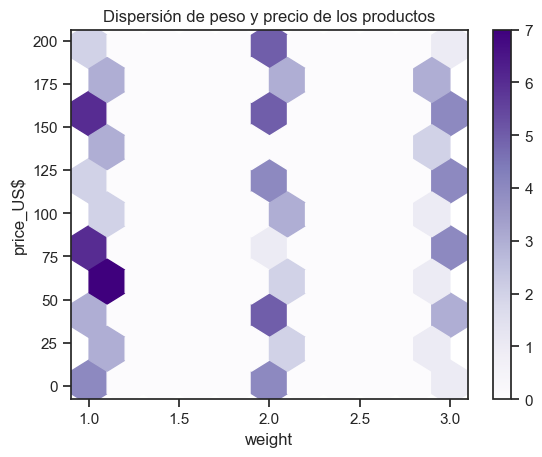

In [5]:
#Ejercicio 2
#Dos variables numéricas

weight_price = products.plot.hexbin(x= 'weight' , y='price_US$' , title = 'Dispersión de peso y precio de los productos', 
                gridsize=10, cmap='Purples')
weight_price;

Justificacion del gráfico:

El gráfico de hexágonos es una variante del diagrama de dispersión (scatterplot) 
que se utiliza para representar la relación entre dos variables numéricas.
En este caso, incorpora además una escala de color que indica la densidad de puntos.
Esto permite identificar visualmente las zonas con mayor o menor concentración de datos.

Interpretación de los resultados:

El siguiente diagrama evidencia que los productos analizados presentan únicamente tres valores de peso: 1, 2 y 3 kg.
Independientemente del peso, los precios oscilan hasta un máximo de US$200.
La mayor concentración de productos se observa en aquellos de 1 kg, con precios ubicados principalmente entre US$50 y US$75,
y también en torno a US$150. En cambio, los productos de 2 y 3 kg se distribuyen con menor densidad y mayor variabilidad en sus precios.

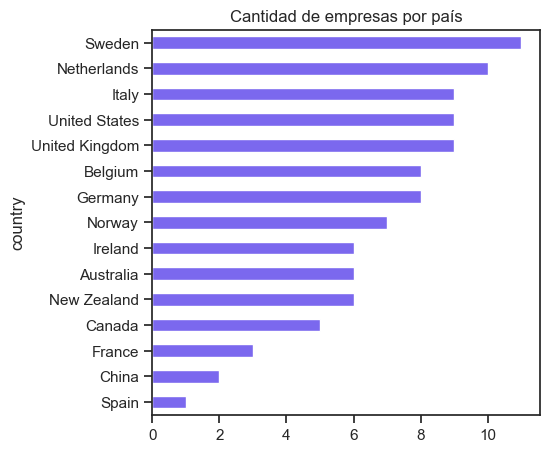

In [6]:
# Ejercicio 3
# Una variable categórica

count_co_pais = companies['country'].value_counts().sort_values(ascending=True)    #.plot.barh()
empresas_pais = count_co_pais.plot(kind='barh', color='mediumslateblue' , title='Cantidad de empresas por país' , figsize= (5,5))
empresas_pais;

Justificacion del gráfico:

El gráfico de barras presenta de forma clara el recuento de una variable categórica. 
La horizontalidad permite ver las categorias rapidamente en el eje 'y'.
Este tipo de visualización facilita la comparación de categorías y permite identificar rápidamente cuáles presentan mayores o menores frecuencias.

Interpretación de los resultados:

El siguiente grafico evidencia - como en un ranking - la cantidad de empresas por pais de la BBDD.
Se destacan Suecia y los Paises Bajos por mayor cantidad y España con la menor cantidad. 
El resto de los paises, de un total de 15, se ubican dentro del rango de aprox. hasta 10/11 empresas.

El siguiente gráfico presenta, a modo de ranking, la cantidad de empresas registradas por país en la base de datos.
Suecia y los Países Bajos se destacan por concentrar el mayor número de empresas (10/11 empresas), 
mientras que España exhibe la menor participación (1 empresa).
El resto de los países, de un total de 15, muestran recuentos intermedios, con valores que alcanzan las 8 empresas.

C:\Users\Georgina\AppData\Local\Temp\ipykernel_28128\981579665.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  trans_amount_status = sns.boxplot(transactions, x='declined' , y='transaction_US$', palette=['m' , 'b'])


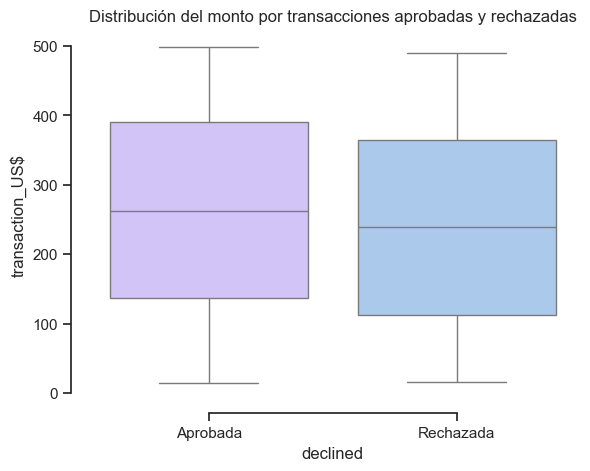

In [7]:
# Ejercicio 4 
# Una variable categórica y una numérica

trans_amount_status = sns.boxplot(transactions, x='declined' , y='transaction_US$', palette=['m' , 'b'])
trans_amount_status.set(title="Distribución del monto por transacciones aprobadas y rechazadas")
sns.despine(offset=10, trim=True);

Justificacion del gráfico:

El gráfico de tipo 'boxplot' permite visualizar la distribución estadística de una variable numérica,
mostrando los cuartiles (Q1, Q2, Q3) y posibles valores atípicos ('outliers')
En este caso, al tratarse de una variable categórica dicotómica, el boxplot facilita la comparación
de las características de distribución del monto de las transacciones (eje 'y') entre ambos grupos.

Interpretación de los resultados:

El gráfico muestra una leve diferencia entre las distribuciones del monto de las transacciones realizadas por los usuarios.
Los montos de las transacciones aprobadas resultan ligeramente superiores a los de las rechazadas.
Esta diferencia también se refleja en las medidas estadísticas de ambas categorías (mínimo, máximo, Q1, mediana y Q3).
No se observan valores atípicos ('outliers') en ninguna de las distribuciones.

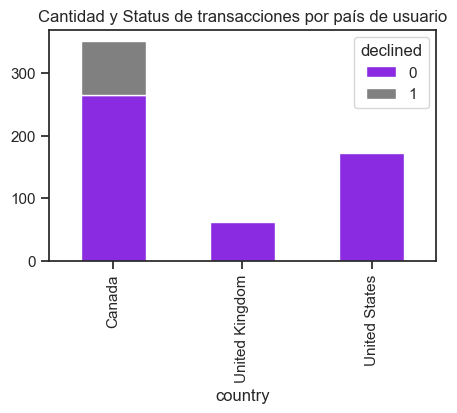

In [8]:
# Ejercicio 5
# Dos variables categóricas

user_country_status = pd.crosstab(merge_tx_user['country'], merge_tx_user['declined']).plot.bar(
    stacked=True, figsize=(5, 3), color = ['blueviolet', 'grey'],                                                                        
    title='Cantidad y Status de transacciones por país de usuario')

user_country_status;

Justificacion del gráfico:

El gráfico de barras apiladas permite representar variables categóricas compuestas por múltiples subgrupos de la categoría principal.
Cada barra (categoría principal, ubicada en el eje 'x') muestra el total acumulado y la proporción o tamaño de cada subgrupo, 
expresado como magnitud en el eje 'y'.
Este tipo de gráfico facilita la comparación entre las categorías principales y entre sus proporciones internas.
Las barras pueden expresarse en valores absolutos o en porcentajes.

Interpretación de los resultados:

La comparación del total de transacciones realizadas por los usuarios de los tres países muestra a Canadá como el país con mayor actividad,
superando las 300 transacciones. 
El Reino Unido representa el menor volumen, con menos de 50, mientras que Estados Unidos se encuentra en una posición intermedia.
Solo Canadá presenta transacciones rechazadas, en una proporción no alarmante pero a evaluar.

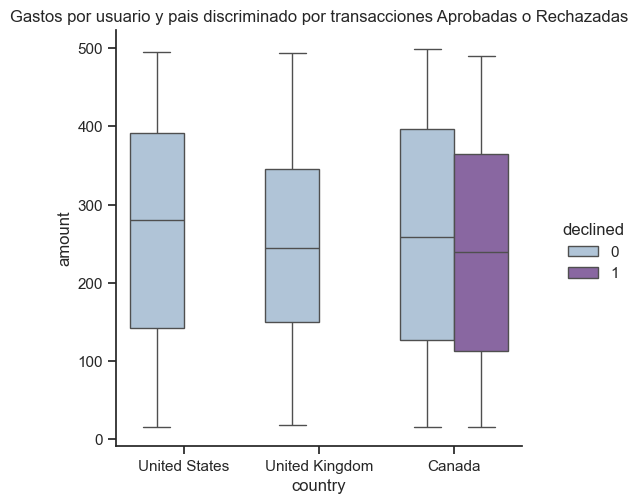

In [15]:
# Ejercicio 6
# Tres variables

sns.catplot(data=merge_tx_user, kind="box", x="country", y='amount', hue="declined", palette = 'BuPu',
             height= 5).set(title='Gastos por usuario y pais discriminado por transacciones Aprobadas o Rechazadas');

Justificacion del gráfico:

El gráfico tipo 'boxplot' permite analizar la distribución de una variable cuantitativa en función de una categoría,
mostrando la mediana, la dispersión, posibles valores extremos y diferencias entre grupos. 
El uso del parámetro 'hue' permite discriminar una variable categórica, añadiendo información útil
para el análisis comparativo dentro de cada categoría principal.

Interpretación de los resultados:

El gráfico presenta la comparativa de montos de transacción para los tres países registrados por los usuarios.
Se observan valores máximos cercanos a los US$ 500 y mínimos en torno a los US$ 20.
Las distribuciones no muestran diferencias significativas entre países, aunque el Reino Unido presenta el rango más concentrado, 
con la mayoría de transacciones agrupadas en niveles intermedios. EEUU presenta la mediana más alta, cerca de los US$300
Canadá es el único país que registra transacciones rechazadas, aunque no se detectan valores atípicos en ningún grupo.


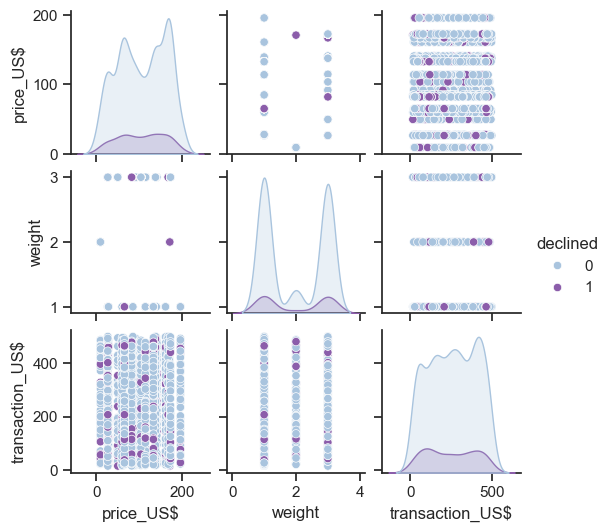

In [ ]:
#Ejercicio 7
#Graficar un Pairplot

sns.pairplot(merge_tp_final[['price_US$','weight', 'transaction_US$', 'declined']] , hue='declined', palette= "BuPu" , height=1.8)   

Justificacion del gráfico:

El gráfico tipo 'pairplot' permite explorar simultáneamente las relaciones entre variables cuantitativas
y visualizar la distribución estadística de cada una de ellas.
Al incorporar el parámetro 'hue', es posible incluir una variable categórica,
permitiendo evaluar la influencia de la misma en le conjunto de los datos y ofreciendo la posibilidad de informacion útil.


Interpretación de los resultados:

El siguiente gráfico presenta las relaciones entre cuatro variables de la BBDD evaluada: Precio y Peso del producto, 
Monto de la transaccion y el status de la misma Aprobada o Rechazada (variable dicotomica). En todos los casos,
para peso, precio y monto total, las transacciones rechazadas respresentan una proporción poco significativa.
No hay relacion definida entre precio de los productos y montos totales de las operaciones realizadas.


# Nivel 2

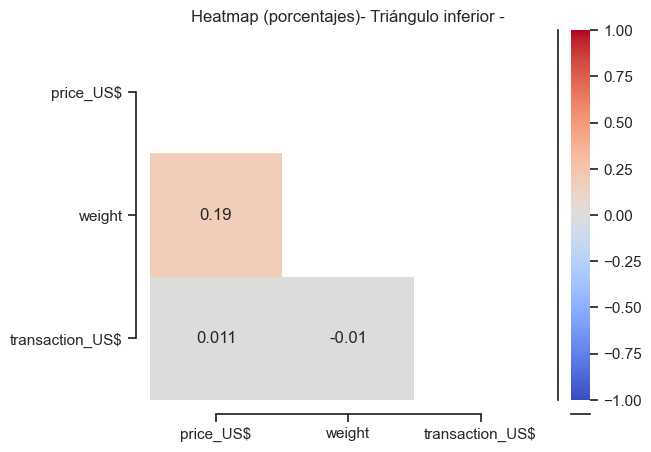

In [ ]:
#Ejercicio 1
#Correlación de todas las variables numéricas

# Genera una matriz de correlación de las variables numericas del dataframe final (transactions+products)
corr_trans_pct = merge_tp_final[['price_US$', 'weight', 'transaction_US$']].corr()

# Genera una "máscara" que recortará el heatmap por la mitad, visivilizando las correlaciones 1 solo vez (con la matriz completa se repiten)
mask = np.triu(np.ones_like(corr_trans_pct, dtype=bool))

# Heatmap  con mascara aplicada
sns.heatmap(corr_trans_pct, mask=mask, annot=True, cmap = 'coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap (porcentajes)- Triángulo inferior -")
sns.despine(offset=10, trim=True);

Justificacion del gráfico:

El 'heatmap' permite visualizar la intensidad de la relacion entre 2 variables basándose en el coeficiente de correlación de Pearson

Se mide entre 1 y -1 representando relación directo o inversa. Cero representa 'no relacion lineal'.
Se representa con una escala de color.

Interpretación de los resultados:

Dentro de la escala -1, 1 de correlación, las variables analizadas poseen una bajisima correlacion entre ellas. 
Las compras de los usuarios no tienen relacion entre monto total y precios de los productos o el peso de los mismos. 
En el caso de la relación precio-peso del producto hay una muy baja correlacion positiva lo cual 
no permite afirmar una relación significativa.

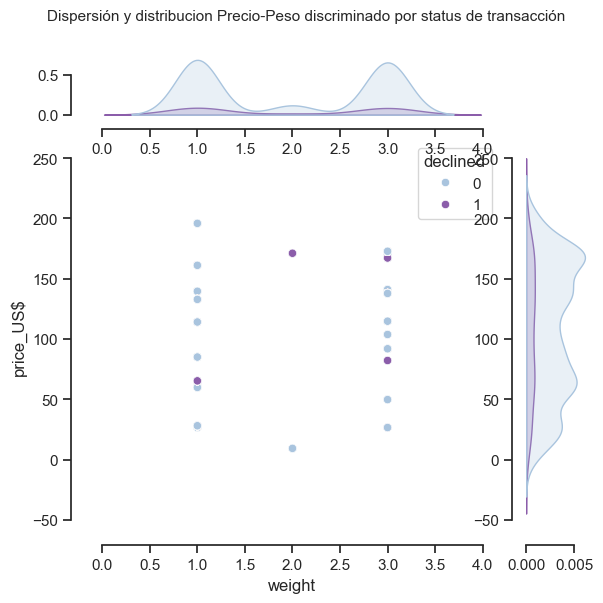

In [ ]:
#Ejercicio 2
#Implementa un jointplot

# Jointplot para las variables peso y precio de los productos discriminadas por aprobación o rechazo de las transacciones realizadas

joint_weight_price = sns.jointplot(data=merge_tp_final, x= 'weight', y='price_US$', hue='declined', palette = 'BuPu')

joint_weight_price.set_axis_labels('weight','price_US$')
joint_weight_price.fig.suptitle("Dispersión y distribucion Precio-Peso discriminado por status de transacción", fontsize=11) 
joint_weight_price.fig.tight_layout()
joint_weight_price.fig.subplots_adjust(top=0.90)  
sns.despine(offset=10, trim=True)

Interpretación de los resultados:

La mayoria de los productos pesan 1kg o 3kg y pertenecen a transacciones aprobadas. 
Las rechazadas no son significativas.
Para ambos pesos de los productos hay un rango amplio de precios de hasta US$200.

#Nivel 3

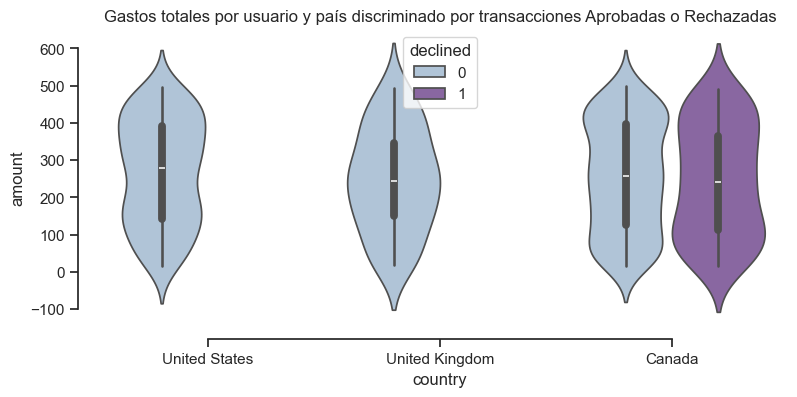

In [ ]:
#Ejercicio 1
#Implementa un violinplot combinado con otro tipo de gráfico.

plt.figure(figsize=(8, 4))

sns.violinplot(
    data=merge_tx_user,
    x="country",
    y="amount",
    hue="declined",
    palette="BuPu",
    dodge=True
)

plt.title('Gastos totales por usuario y país discriminado por transacciones Aprobadas o Rechazadas')
plt.tight_layout()
sns.despine(offset=10, trim=True)




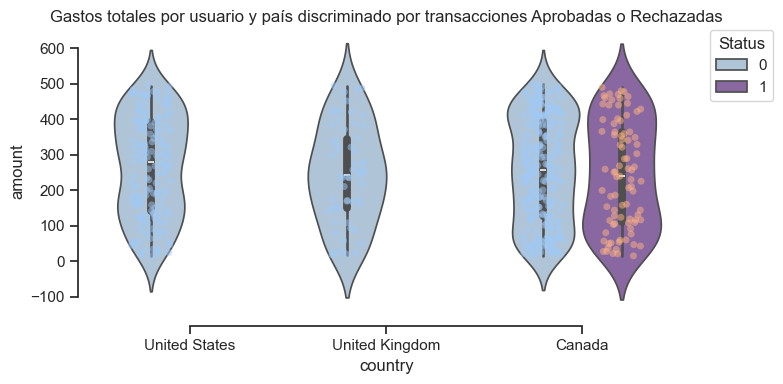

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

# Violinplot con leyenda
sns.violinplot(
    data=merge_tx_user,
    x="country",
    y="amount",
    hue="declined",
    palette="BuPu",
    dodge=True
)

# Stripplot sin leyenda
sns.stripplot(
    data=merge_tx_user,
    x="country",
    y="amount",
    hue="declined",
    dodge=True,
    jitter=0.2,
    alpha=0.5,
    legend=False  # <- Esto evita la segunda leyenda
)

# Mover la leyenda del primer gráfico
plt.legend(
    title="Status",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.
)

plt.title('Gastos totales por usuario y país discriminado por transacciones Aprobadas o Rechazadas')
plt.tight_layout()
sns.despine(offset=10, trim=True)


Interpretación de los resultados:

Solo Canada presenta tanto transacciones aprobadas y rechazadas. El rango de precios de las transacciones es similar en ambos casos
con min, max y mediana apenas más bajas para las transacciones rechazadas. 
La cantidad de transacciones rechazadas son mayores que las aprobadas para Canada con mayor concentración en valores alrededor de US$100
Para los EEUU y el Reino Unido solo se registran transacciones aprobadas. EEUU muestra mayor cantidad de transacciones cerca de US$100 y US$400 
mientras el Reino Unido muestra un pico de transacciones en aproximadamente US$200 y cantidades decrecientes hacia arriba 
y abajo del rango de montos de transacción.
Se encuentran algunas transacciones "outliers" (por fuera de la distribución de densidad del violin)


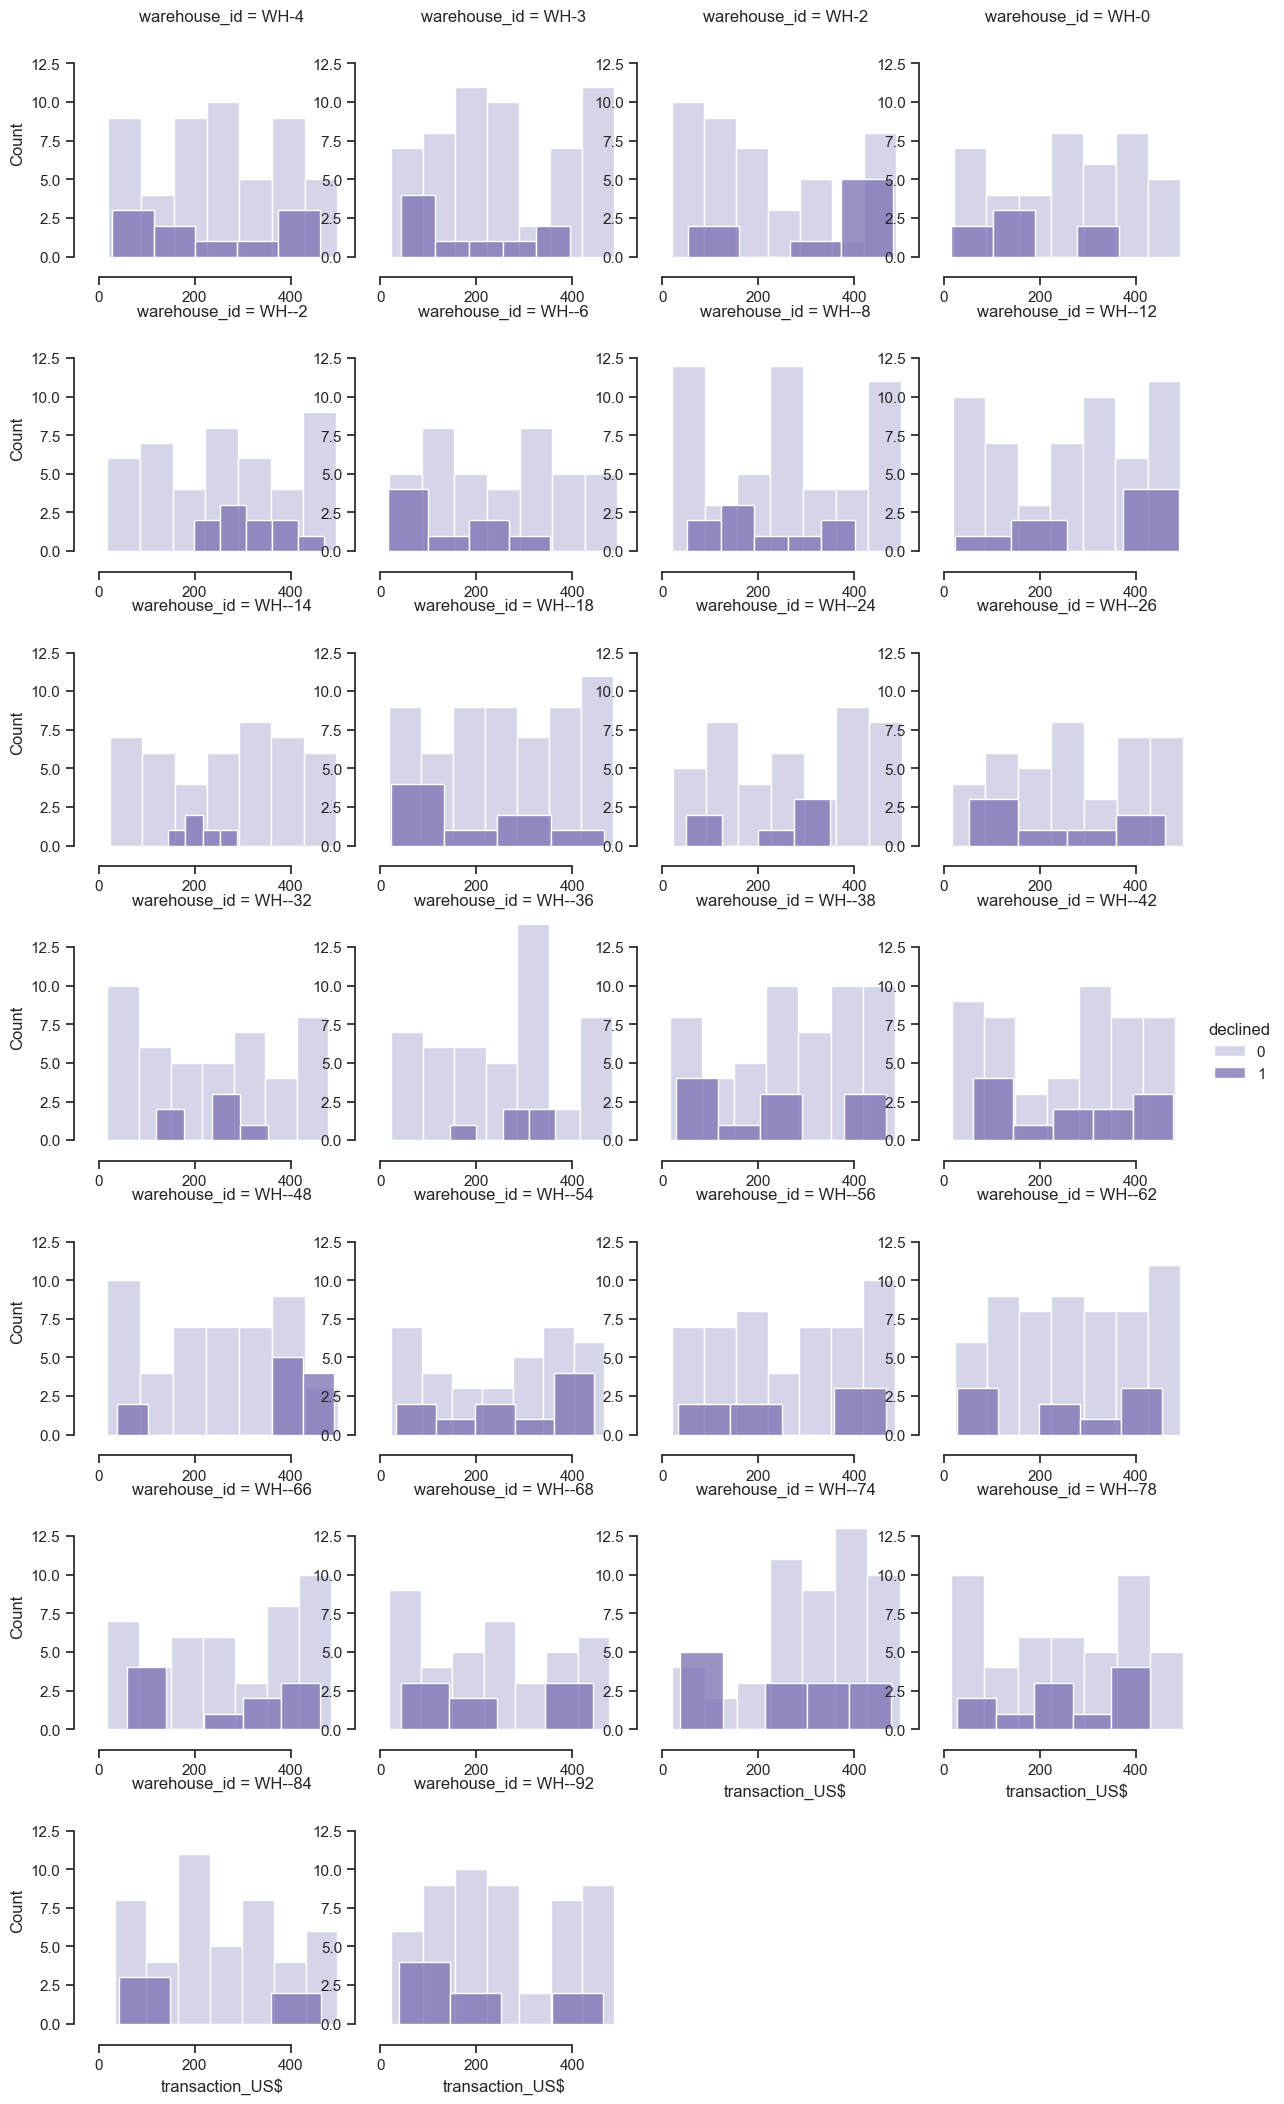

In [ ]:
#Ejercicio 2
#Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

facet_hue = sns.FacetGrid(merge_tp_final, col="warehouse_id", hue="declined", col_wrap=4, height=3, palette= 'Purples')
facet_hue.map_dataframe(sns.histplot, x='transaction_US$')
facet_hue.add_legend()
sns.despine(offset=15, trim=True);

Interpretación de los resultados:
Todos los almacenes presentan una proporcion menor de transacciones de montos variados que fueron rechazadas.

In [ ]:

cursor.close()
connection.close()   #Cierra la conexion con MYSQL